In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from math import *

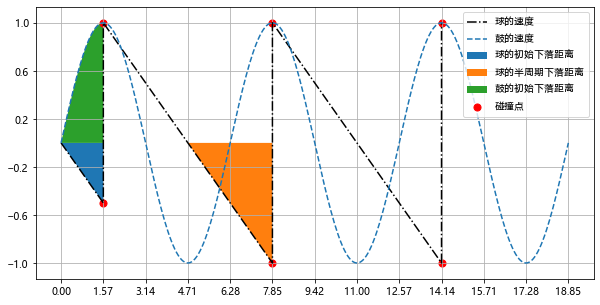

In [2]:
plt.figure(figsize=(10, 5))
plt.grid()
x = np.linspace(0, 6 * np.pi, 300)
y = np.sin(x)
d = np.pi / 2

plt.yticks(np.linspace(-1, 1, 6))
plt.xticks(np.linspace(0, 15 * d, 16))

x1 = [0, d, d, 5 * d, 5 * d, 9 * d, 9 * d]
y1 = [0, -0.5, 1, -1, 1, -1, 1]

x2 = [d, d, 5 * d, 5 * d, 9 * d, 9 * d]
y2 = [-0.5, 1, -1, 1, -1, 1]

plt.fill_between([0, d], [0, -0.5], label='球的初始下落距离')
plt.fill_between([3 * d, 5 * d], [0, -1], label='球的半周期下落距离')
plt.fill_between(np.linspace(0, 0.5 * np.pi, 100), np.sin(np.linspace(0, 0.5 * np.pi, 100)), label='鼓的初始下落距离')

plt.plot(x1, y1, color="black", linestyle="-.", label='球的速度')
plt.plot(x, y, linestyle="--", label='鼓的速度')

plt.scatter(x2, y2, color="r", s=50, label='碰撞点')
plt.legend(loc='upper right')

plt.savefig("../res/pic/q1-v-t.png", dpi=720)

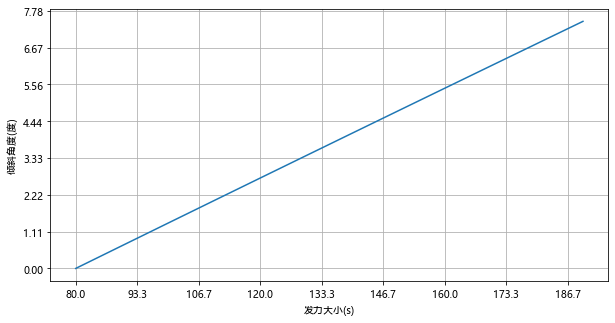

In [3]:
f_a = pd.read_csv("../res/csv/force_angle.csv")
plt.figure(figsize=(10, 5))
plt.grid()

plt.yticks(np.linspace(0, 10, 10))
plt.xticks(np.linspace(80, 200, 10))

plt.xlabel("发力大小(s)")
plt.ylabel("倾斜角度(度)")

plt.plot(f_a["force"],f_a["angle_y"])

plt.savefig("../res/pic/q3-f-a.png", dpi=720)

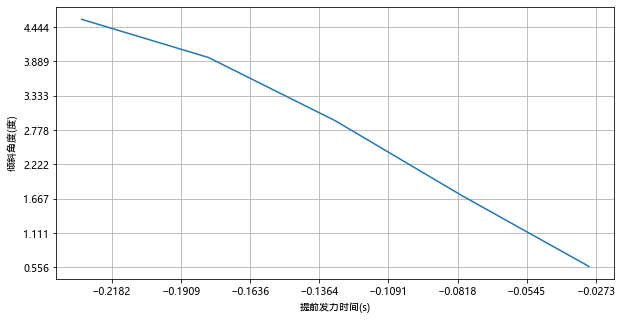

In [4]:
f_a = pd.read_csv("../res/csv/time_angle.csv")
plt.figure(figsize=(10, 5))
plt.grid()

plt.yticks(np.linspace(0, 5, 10))
plt.xticks(np.linspace(-0.3, 0, 12))

plt.xlabel("提前发力时间(s)")
plt.ylabel("倾斜角度(度)")

plt.plot(f_a["time"],f_a["angle_y"])

plt.savefig("../res/pic/q3-t-a.png", dpi=720)

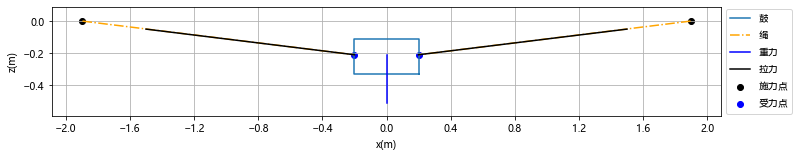

In [5]:
plt.figure(figsize=(12, 2))
plt.grid()
plt.xlabel("x(m)")
plt.ylabel("z(m)")

plt.plot([0.2,0.2,-0.2,-0.2,0.2],[-0.33,-0.11,-0.11,-0.33,-0.33], label="鼓")
l = sqrt(1.7**2-0.11**2)+0.2

plt.xticks(np.linspace(-2, 2, 11))
plt.yticks(np.linspace(-0.6, 0, 4))
plt.axis('equal')
plt.scatter([l,-l],[0,0],color="black", label="施力点")
plt.scatter([-0.2,0.2],[-0.21,-0.21],color="b", label="受力点")

plt.plot([l,0.2],[0,-0.21],"-.",color="orange", label="绳")
plt.plot([-l,-0.2],[0,-0.21],"-.",color="orange")

plt.plot([0,0],[-0.21,-0.51],color="b", label="重力")
plt.plot([-0.2,-1.5],[-0.21,-0.05],color="black", label="拉力")
plt.plot([0.2,1.5],[-0.21,-0.05],color="black")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("../res/pic/q2-f.png", dpi=720)

<IPython.core.display.Javascript object>


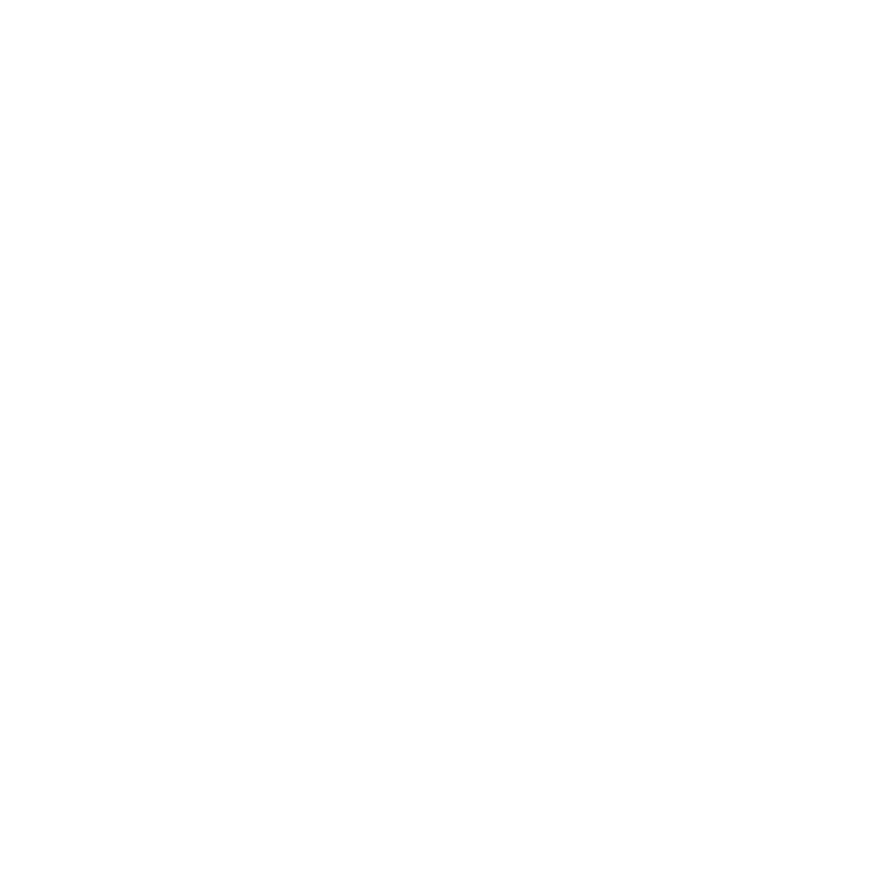

In [6]:
%matplotlib notebook

er8 = pd.read_csv("../res/csv/er_8.csv", header=None)
ee8 = pd.read_csv("../res/csv/ee_8.csv", header=None)

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
person_num = 8
for i in range(1, person_num):
    ax.plot(ee8[3 * i][10:], ee8[3 * i + 1][10:], ee8[3 * i + 2][10:], ":", color="red")
ax.plot(ee8[0][10:], ee8[1][10:], ee8[2][10:], ":", color="red", label="鼓上受力点的移动轨迹")

for j in range(10, len(ee8[1]), 20):
    x = [ee8[3 * i][j] for i in range(person_num)] + [ee8[0][j]]
    y = [ee8[3 * i + 1][j] for i in range(person_num)] + [ee8[1][j]]
    z = [ee8[3 * i + 2][j] for i in range(person_num)] + [ee8[2][j]]
    ax.plot(x, y, z, label="t={}s时鼓的位置".format(round(0.1*j /2/ 100, 3)), linewidth=2)

for i in range(person_num):
    for j in range(10, len(ee8[1]), 20):
        x = [ee8[3 * i][j], er8[0][i]]
        y = [ee8[3 * i + 1][j], er8[1][i]]
        z = [ee8[3 * i + 2][j], er8[2][i]]
        ax.plot(x, y, z, color="orange", linewidth="0.5")

ax.set_xlabel("y(m)")
ax.set_ylabel("x(m)")
ax.set_zlabel("z(m)")

ax.scatter(er8[0], er8[1], er8[2], color="black", label="施力者")
plt.legend(loc='upper right')

plt.savefig("../res/pic/q2-res.png", dpi=720)

<IPython.core.display.Javascript object>


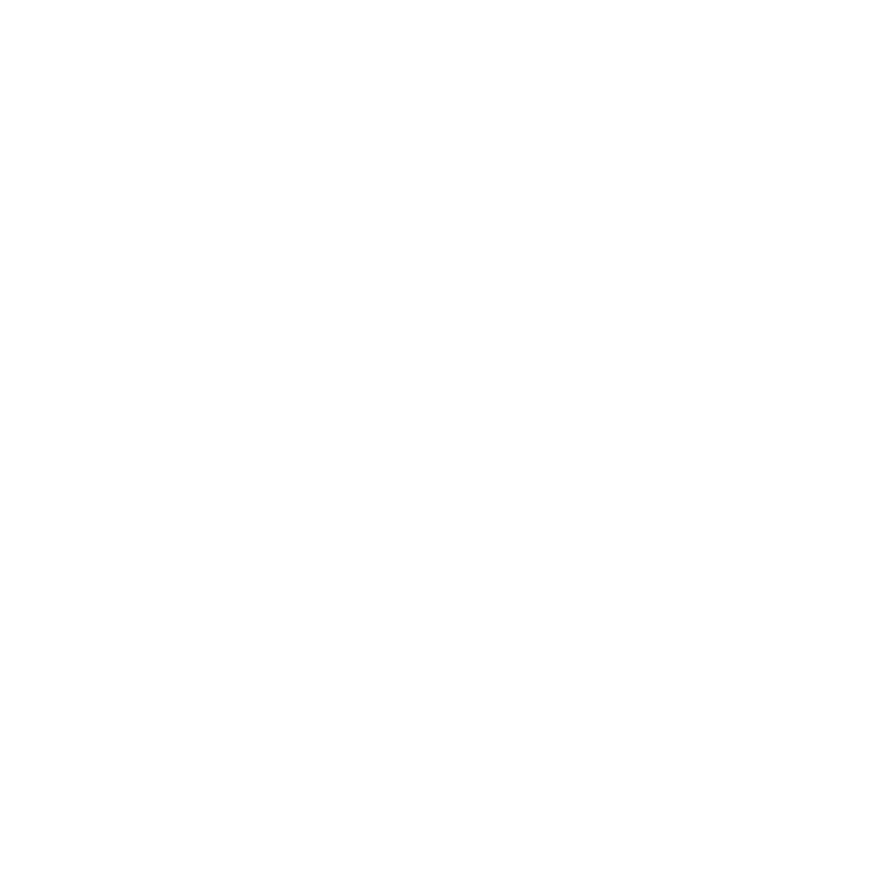

In [7]:
%matplotlib notebook

er = pd.read_csv("../res/csv/er_10.csv", header=None)
ee = pd.read_csv("../res/csv/ee_10.csv", header=None)

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
person_num = 10
for i in range(1, person_num):
    ax.plot(ee[3 * i][10:], ee[3 * i + 1][10:], ee[3 * i + 2][10:], ":", color="red")
ax.plot(ee[0][10:], ee[1][10:], ee[2][10:], ":", color="red", label="鼓上受力点的移动轨迹")

for j in range(10, len(ee[1]), 20):
    x = [ee[3 * i][j] for i in range(person_num)] + [ee[0][j]]
    y = [ee[3 * i + 1][j] for i in range(person_num)] + [ee[1][j]]
    z = [ee[3 * i + 2][j] for i in range(person_num)] + [ee[2][j]]
    ax.plot(x, y, z, label="t={}s时鼓的位置".format(round(j /len(ee[1]) *0.139, 3)), linewidth=2)

for i in range(person_num):
    for j in range(10, len(ee[1]), 20):
        x = [ee[3 * i][j], er[0][i]]
        y = [ee[3 * i + 1][j], er[1][i]]
        z = [ee[3 * i + 2][j], er[2][i]]
        ax.plot(x, y, z, color="orange", linewidth="0.5")

ax.set_xlabel("y(m)")
ax.set_ylabel("x(m)")
ax.set_zlabel("z(m)")

ax.scatter(er[0], er[1], er[2], color="black", label="施力者")
plt.legend(loc='upper right')

plt.savefig("../res/pic/q4-res.png", dpi=720)

<IPython.core.display.Javascript object>


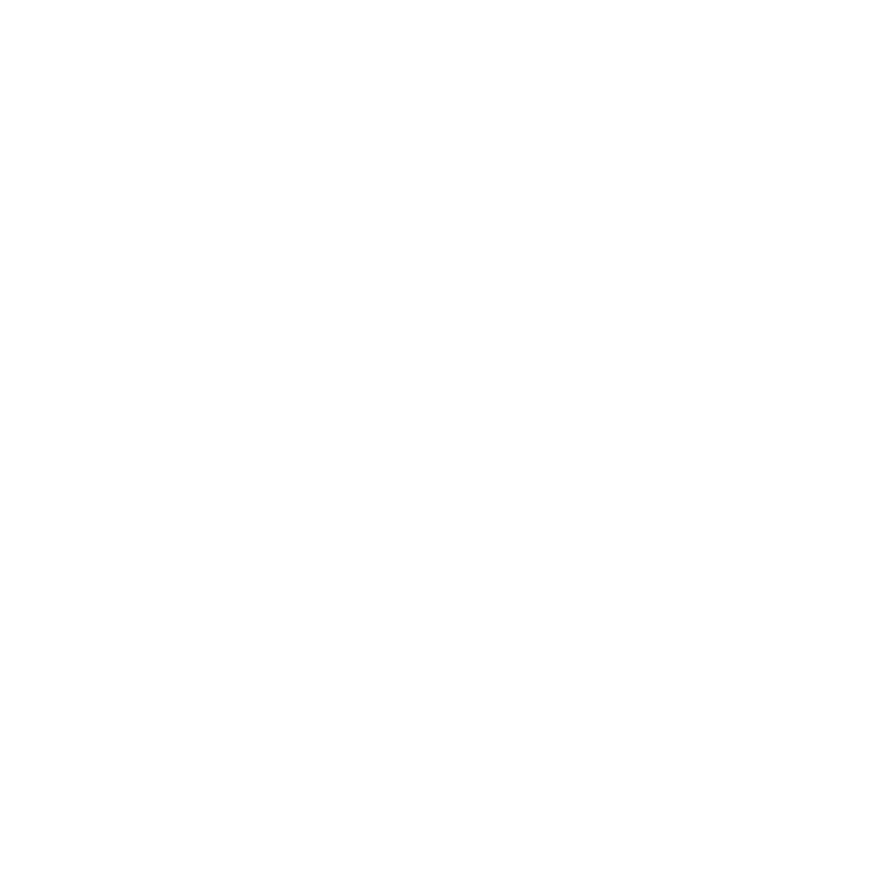

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)



# drum
r=0.2
theta = np.arange(0, 2*np.pi, 0.1)
x = 0 + r * np.cos(theta)
y = 0 + r * np.sin(theta)
x = np.append(x,x[0])
y = np.append(y,y[0])

for i in range(-22,0):
    ax.plot(x, y, i/100,"peru",alpha=0.8)
ax.plot(x, y, i/100,"peru",alpha=0.8,label="鼓")    

angel=np.arange(0, 2*np.pi,2*pi/8)
x = 0 + r * np.cos(angel)
y = 0 + r * np.sin(angel)

ax.scatter(x, y,-0.11,color="navy",linewidth=0.1,label="受力点(绳鼓连接处)")

# 人和绳
ax.scatter(er8[0], er8[1], er8[2], color="black", label="施力点(人手)")
for i in range(8):
    ax.plot([er8[0][i],x[i]],[er8[1][i],y[i]],[er8[2][i],-0.11],"orange",linewidth=1)
ax.plot([er8[0][i],x[i]],[er8[1][i],y[i]],[er8[2][i],-0.11],"orange",linewidth=1, label="绳")
    
# 坐标轴
ax.plot([-2.5,2.5], [0,0], [0,0],"black",linewidth=0.8)
ax.plot([0,0], [-2.5,2.5], [0,0],"black",linewidth=0.8)
ax.plot([0,0], [0,0], [-1,1],"black",linewidth=0.8,label="坐标轴")

ax.set_xlabel("y(m)")
ax.set_ylabel("x(m)")
ax.set_zlabel("z(m)")

plt.legend(loc='upper right')

plt.savefig("../res/pic/q1-situation.png", dpi=720)

<IPython.core.display.Javascript object>


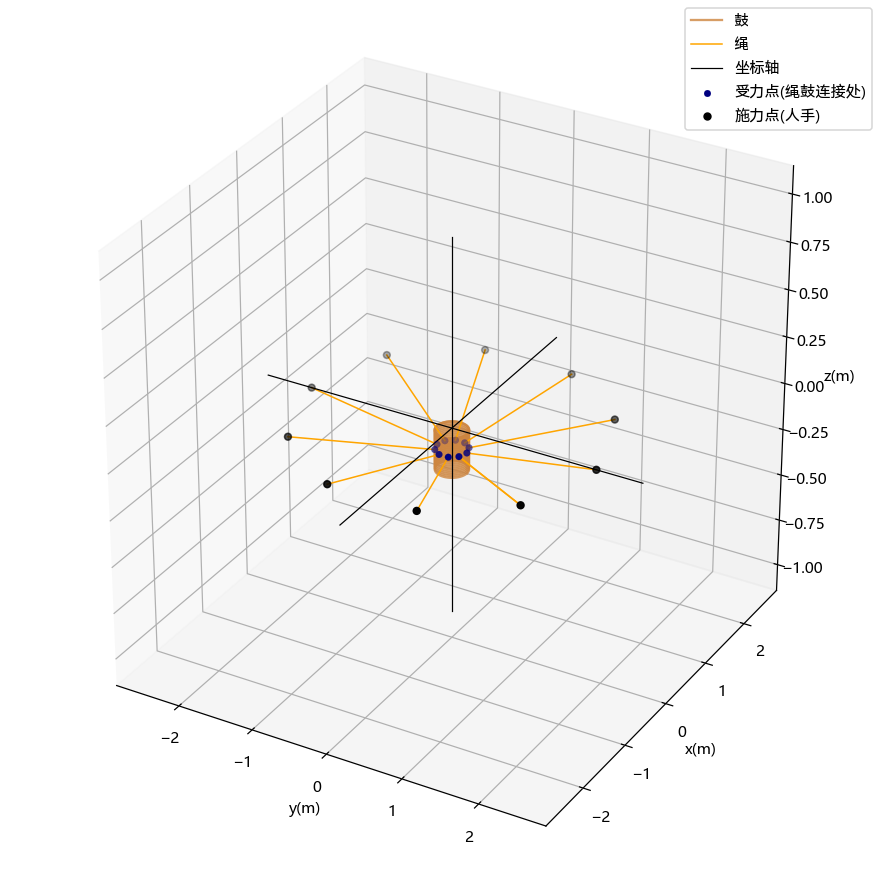

In [12]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

# drum
r=0.2
theta = np.arange(0, 2*np.pi, 0.1)
x = 0 + r * np.cos(theta)
y = 0 + r * np.sin(theta)
x = np.append(x,x[0])
y = np.append(y,y[0])

for i in range(-22,0):
    ax.plot(x, y, i/100,"peru",alpha=0.8)
ax.plot(x, y, i/100,"peru",alpha=0.8,label="鼓")    

angel=np.arange(0, 2*np.pi,2*pi/10)
x = 0 + r * np.cos(angel)
y = 0 + r * np.sin(angel)

ax.scatter(x, y,-0.11,color="navy",linewidth=0.1,label="受力点(绳鼓连接处)")

# 人和绳
ax.scatter(er[0], er[1], er[2], color="black", label="施力点(人手)")
for i in range(10):
    ax.plot([er[0][i],x[i]],[er[1][i],y[i]],[er[2][i],-0.11],"orange",linewidth=1)
ax.plot([er[0][i],x[i]],[er[1][i],y[i]],[er[2][i],-0.11],"orange",linewidth=1, label="绳")
    
# 坐标轴
ax.plot([-2.5,2.5], [0,0], [0,0],"black",linewidth=0.8)
ax.plot([0,0], [-2.5,2.5], [0,0],"black",linewidth=0.8)
ax.plot([0,0], [0,0], [-1,1],"black",linewidth=0.8,label="坐标轴")

ax.set_xlabel("y(m)")
ax.set_ylabel("x(m)")
ax.set_zlabel("z(m)")

plt.legend(loc='upper right')

plt.savefig("../res/pic/q4-situation.png", dpi=720)

<IPython.core.display.Javascript object>


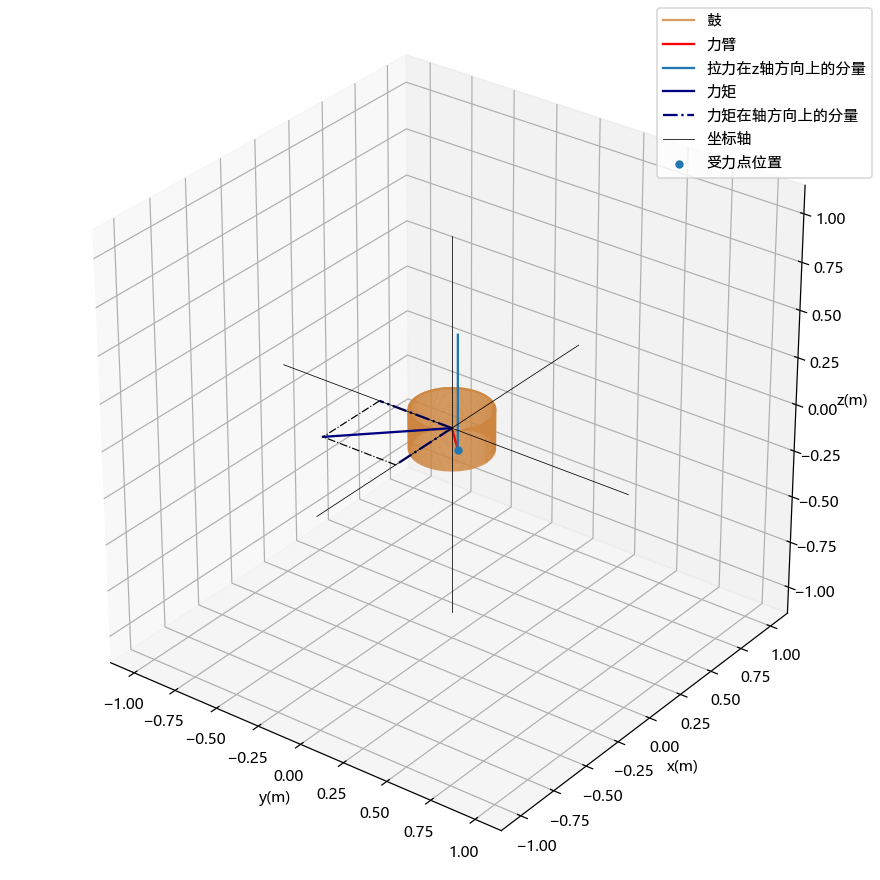

In [47]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

# drum
r=0.2
theta = np.arange(0, 2*np.pi, 0.1)
x = 0 + r * np.cos(theta)
y = 0 + r * np.sin(theta)
x = np.append(x,x[0])
y = np.append(y,y[0])

for i in range(-11,11):
    ax.plot(x, y, i/100,"peru",alpha=0.8)
ax.plot(x, y, i/100,"peru",alpha=0.8,label="鼓")    

l = -0.2/sqrt(2)
ax.scatter([-l],[l],0,label="受力点位置")
ax.plot([0,-l],[0,l],0,color="red",label="力臂")
ax.plot([-l,-l],[l,l],[0,0.6],label="拉力在z轴方向上的分量")
ax.plot([0,3*l],[0,3*l],0,color="navy",label="力矩")

ax.plot([0,0],[0,3*l],0,"-.",color="navy",label="力矩在轴方向上的分量")
ax.plot([0,3*l],[0,0],0,"-.",color="navy")

ax.plot([3*l,3*l],[0,3*l],0,"-.",color="black",linewidth=0.8)
ax.plot([0,3*l],[3*l,3*l],0,"-.",color="black",linewidth=0.8)
    
# 坐标轴
ax.plot([-1,1], [0,0], [0,0],"black",linewidth=0.5)
ax.plot([0,0], [-1,1], [0,0],"black",linewidth=0.5)
ax.plot([0,0], [0,0], [-1,1],"black",linewidth=0.5,label="坐标轴")

ax.set_xlabel("y(m)")
ax.set_ylabel("x(m)")
ax.set_zlabel("z(m)")

plt.legend(loc='upper right')


#plt.savefig("../res/pic/q2-f-r.png", dpi=720)

<IPython.core.display.Javascript object>


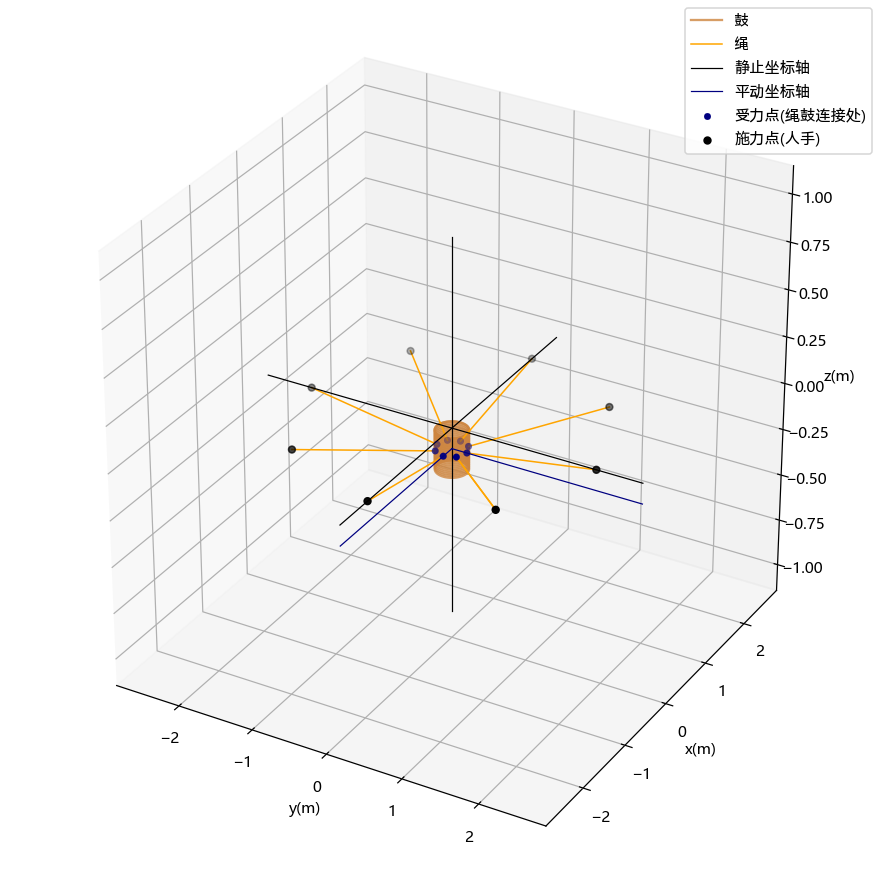

In [55]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)



# drum
r=0.2
theta = np.arange(0, 2*np.pi, 0.1)
x = 0 + r * np.cos(theta)
y = 0 + r * np.sin(theta)
x = np.append(x,x[0])
y = np.append(y,y[0])

for i in range(-22,0):
    ax.plot(x, y, i/100,"peru",alpha=0.8)
ax.plot(x, y, i/100,"peru",alpha=0.8,label="鼓")    

angel=np.arange(0, 2*np.pi,2*pi/8)
x = 0 + r * np.cos(angel)
y = 0 + r * np.sin(angel)

ax.scatter(x, y,-0.11,color="navy",linewidth=0.1,label="受力点(绳鼓连接处)")

# 人和绳
ax.scatter(er8[0], er8[1], er8[2], color="black", label="施力点(人手)")
for i in range(8):
    ax.plot([er8[0][i],x[i]],[er8[1][i],y[i]],[er8[2][i],-0.11],"orange",linewidth=1)
ax.plot([er8[0][i],x[i]],[er8[1][i],y[i]],[er8[2][i],-0.11],"orange",linewidth=1, label="绳")
    
# 坐标轴
ax.plot([-2.5,2.5], [0,0], [0,0],"black",linewidth=0.8)
ax.plot([0,0], [-2.5,2.5], [0,0],"black",linewidth=0.8)
ax.plot([0,0], [0,0], [-1,1],"black",linewidth=0.8,label="静止坐标轴")

ax.plot([0,2.5], [0,0], [-0.11,-0.11],"navy",linewidth=0.8)
ax.plot([0,0], [0,-2.5], [-0.11,-0.11],"navy",linewidth=0.8,label="平动坐标轴")

ax.set_xlabel("y(m)")
ax.set_ylabel("x(m)")
ax.set_zlabel("z(m)")

plt.legend(loc='upper right')

plt.savefig("../res/pic/q1-situation1.png", dpi=720)